# Rac interactors during encystation of Giardia lamblia 

In [2]:
# preliminaries 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
import numpy as np 
import seaborn
%matplotlib inline

In [3]:
# pull in data 
data = pd.read_csv('Sim_troph_3rd_8h_1st.csv')

In [4]:
data.shape
#data


(1934, 7)

In [5]:
#pulls data for which Num.Seq column value is greater than 2 
sig_data = data.loc[data.NumSeq > 2]
#sig_data['rac_troph']
#sig_data

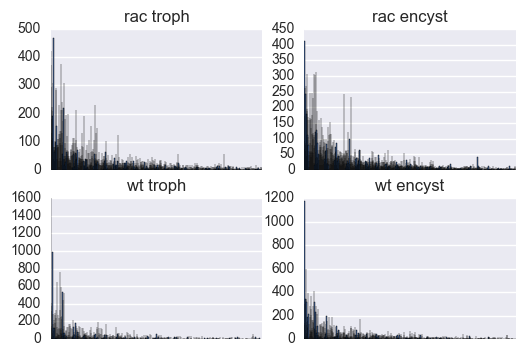

In [6]:
#graph of proteins that have NumSeq >2
fig = plt.figure()

ax1 = fig.add_subplot(221)
ax1.set_title('rac troph')
ax1.axes.get_xaxis().set_visible(False)
sig_data['rac_troph'].plot(kind = 'bar')

ax2 = fig.add_subplot(222)
ax2.set_title('rac encyst')
ax2.axes.get_xaxis().set_visible(False)
sig_data['rac_encyst'].plot(kind = 'bar')

ax3 = fig.add_subplot(223)
ax3.set_title('wt troph')
ax3.axes.get_xaxis().set_visible(False)
sig_data['wt_troph'].plot(kind = 'bar')

ax4 = fig.add_subplot(224)
ax4.set_title('wt encyst')
ax4.axes.get_xaxis().set_visible(False)
sig_data['wt_encyst'].plot(kind = 'bar')


In [7]:
# Categorize the proteins into 2 ranges, <11 or >40.
# Higher NumSeq scores = more important protein or abundance? 
high_prot = sig_data.loc[sig_data['NumSeq'] > 40]
low_prot = sig_data.loc[sig_data['NumSeq'] < 11]

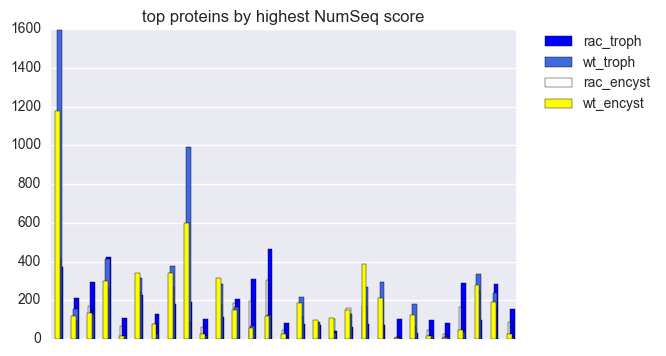

In [64]:
#graph of abundance of top proteins in each category 
b1 = high_prot.rac_troph.plot(kind = 'bar', color = 'blue', position = 0.2, width = 0.3)
b2 = high_prot.wt_troph.plot(kind = 'bar', color = 'royalblue', position = .4 , width = 0.3)
b3 = high_prot.rac_encyst.plot(kind = 'bar', color = '', position = 0.6, width = 0.3)
b4 = high_prot.wt_encyst.plot(kind = 'bar', color = 'yellow', position = 0.8, width = 0.3)

ax1 = plt.axes()

ax1.set_title('top proteins by highest NumSeq score')
x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(False)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

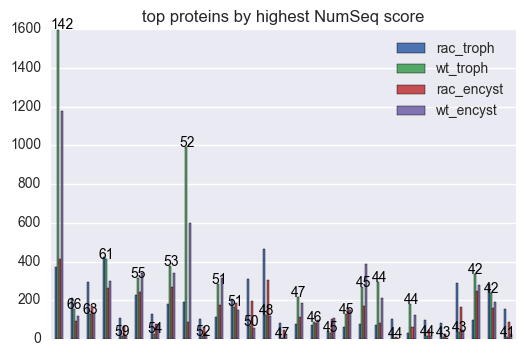

In [144]:
#numSeqScores = high_prot_test.loc[:,'NumSeq']
high_prot_test = high_prot.loc[:,'rac_troph':'wt_encyst']
high_prot_numSeq = np.array(high_prot.loc[:,'NumSeq'])
high_prot_test.plot(kind = 'bar')
ax = plt.axes()
ax.set_title('top proteins by highest NumSeq score')
x_axis = ax.axes.get_xaxis()
x_axis.set_visible(False)
x = np.arange(len(high_prot_test))
y = np.array(high_prot_test.wt_troph)
for i, j in zip(x, y):
    ax.annotate(str(high_prot_numSeq[i]), xy = (i - 0.5,j + 1), color = 'black')


In [42]:
#writes Fasta ID column to csv file for upload at Giardiadb.org
sig_data['Fasta ID'].to_csv('Rac_Interactors_by_NumSeq.fasta')
sig_data = sig_data.copy()
sig_data.loc[:,'rac-wt_troph'] = sig_data['rac_troph'] - sig_data['wt_troph']
sig_data.loc[:,'rac-wt_encyst'] = sig_data['rac_encyst'] - sig_data['wt_encyst']

troph_prot_by_dif = sig_data.sort_values(by = 'rac-wt_troph', ascending = False)
encyst_prot_by_dif = sig_data.sort_values(by = 'rac-wt_encyst', ascending = False)

troph_prot_by_dif['Fasta ID'].to_csv('Rac_Interactors_troph_dif.fasta', index = False)
encyst_prot_by_dif['Fasta ID'].to_csv('Rac_Interactors_encyst_dif.fasta')

In [55]:
#sig_data.sort('Fasta ID')
protein_data = pd.read_csv('GeneByLocusTag_Summary.txt', sep = '\t')